# Sentiment Analysis in Python

This notebook is part of a tutorial that can be found on my [youtube channel here](https://www.youtube.com/channel/UCxladMszXan-jfgzyeIMyvw), please check it out!

In this notebook we will be doing some sentiment analysis in python using two different techniques:
1. VADER (Valence Aware Dictionary and sEntiment Reasoner) - Bag of words approach
2. Roberta Pretrained Model from 🤗
3. Huggingface Pipeline

In [8]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python3 -m pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python3 -m pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python3 -m pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python3 -m pip install --upgrade pip


# Step 0. Read in Data and NLTK Basics

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

plt.style.use('ggplot')

import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [10]:
#from google.colab import files
#files.upload()

In [11]:
# Read in data
df = pd.read_csv('../sentimentos.csv')
print(df.shape)


(11786, 7)


In [12]:
df.head()

,Review,Username,Rating,NegativeRating,NeutralRatings,PositiveFeeling,AppName
0,Crashed too often. Confusing. It shows for ex....,Ayşegül Apaydiner,1,1,0,0,sentimentos
1,It only looks like the legit app but does none...,Harold Galbreath,1,1,0,0,sentimentos
2,"I have a limited data plan, so I figured that ...",A Google user,2,1,0,0,sentimentos
3,This app is not working at all. As soon as I c...,Shounak Basu,1,1,0,0,sentimentos
4,"Google GO apps are garbage. They load slow, cr...",Some Guy,1,1,0,0,sentimentos


In [13]:
#ver o texto completo de uma análise
df['Review'].values[0]

"Crashed too often. Confusing. It shows for ex. 99+ mails in spamfolder, but when I go there it's empty. After a week I have no mails at all. I'm afraid to uninstall, since it prompts me that that could cause my phone to malfunction... I'm seriously frustrated! Prior to this experience my only issue was to create folders w/ different names to organize mail..."

## Quick EDA

In [14]:
#quantidade de dados de acordo com estrelas
df['Rating'].value_counts()

Rating
5    7487
1    1839
4    1148
3     784
2     528
Name: count, dtype: int64

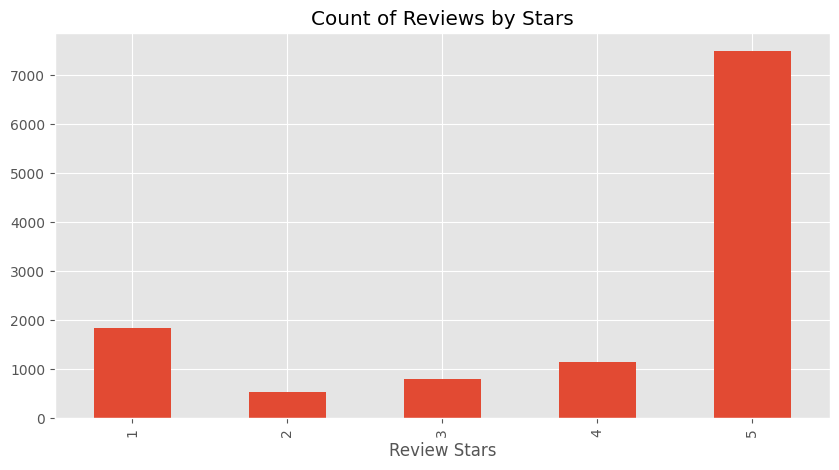

In [15]:
ax = df['Rating'].value_counts().sort_index() \
    .plot(kind='bar',
          title='Count of Reviews by Stars',
          figsize=(10, 5))
ax.set_xlabel('Review Stars')
plt.show()

## Basic NLTK

In [16]:
#exemplo aleatório para tokenização
example = df['Review'][50]
print(example)

This update is so horrible. I thought I was the only one complaining about the app keeps stopping anytime I open to read mails. This is so poor. You've gotta fix this or restore the old version for us.


In [17]:
tokens = nltk.word_tokenize(example)
tokens[:25]

['This',
 'update',
 'is',
 'so',
 'horrible',
 '.',
 'I',
 'thought',
 'I',
 'was',
 'the',
 'only',
 'one',
 'complaining',
 'about',
 'the',
 'app',
 'keeps',
 'stopping',
 'anytime',
 'I',
 'open',
 'to',
 'read',
 'mails']

In [18]:
tagged = nltk.pos_tag(tokens)
tagged[:25]

[('This', 'DT'),
 ('update', 'NN'),
 ('is', 'VBZ'),
 ('so', 'RB'),
 ('horrible', 'JJ'),
 ('.', '.'),
 ('I', 'PRP'),
 ('thought', 'VBD'),
 ('I', 'PRP'),
 ('was', 'VBD'),
 ('the', 'DT'),
 ('only', 'JJ'),
 ('one', 'CD'),
 ('complaining', 'VBG'),
 ('about', 'IN'),
 ('the', 'DT'),
 ('app', 'JJ'),
 ('keeps', 'NNS'),
 ('stopping', 'VBG'),
 ('anytime', 'NN'),
 ('I', 'PRP'),
 ('open', 'VBP'),
 ('to', 'TO'),
 ('read', 'VB'),
 ('mails', 'NNS')]

In [19]:
#identificar entidades
entities = nltk.chunk.ne_chunk(tagged)
print(entities)

(S
  This/DT
  update/NN
  is/VBZ
  so/RB
  horrible/JJ
  ./.
  I/PRP
  thought/VBD
  I/PRP
  was/VBD
  the/DT
  only/JJ
  one/CD
  complaining/VBG
  about/IN
  the/DT
  app/JJ
  keeps/NNS
  stopping/VBG
  anytime/NN
  I/PRP
  open/VBP
  to/TO
  read/VB
  mails/NNS
  ./.
  This/DT
  is/VBZ
  so/RB
  poor/JJ
  ./.
  You/PRP
  've/VBP
  got/VBN
  ta/JJ
  fix/NN
  this/DT
  or/CC
  restore/VB
  the/DT
  old/JJ
  version/NN
  for/IN
  us/PRP
  ./.)


# Step 1. VADER Seniment Scoring

We will use NLTK's `SentimentIntensityAnalyzer` to get the neg/neu/pos scores of the text.

- This uses a "bag of words" approach:
    1. Stop words are removed
    2. each word is scored and combined to a total score.

In [20]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [21]:
sia.polarity_scores('I am so happy!')

{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.6468}

In [22]:
sia.polarity_scores('This is the worst thing ever.')

{'neg': 0.451, 'neu': 0.549, 'pos': 0.0, 'compound': -0.6249}

In [23]:
print(example)
sia.polarity_scores(example)

This update is so horrible. I thought I was the only one complaining about the app keeps stopping anytime I open to read mails. This is so poor. You've gotta fix this or restore the old version for us.


{'neg': 0.264, 'neu': 0.688, 'pos': 0.049, 'compound': -0.8652}

In [24]:
import re
def remove_caracteres_especiais(texto):
    return re.sub(r'[^\w\s]', '', texto)

In [25]:
df['Review'] = df['Review'].apply(lambda x: remove_caracteres_especiais(str(x)))
df['Review'] = df['Review'].fillna('')

In [26]:
# Run the polarity score on the entire dataset
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['Review']
    res[i] = sia.polarity_scores(text)

  0%|          | 0/11786 [00:00<?, ?it/s]

In [27]:
#gerando um dataframe da análise anterior
pd.DataFrame(res).T

,neg,neu,pos,compound
0,0.188,0.774,0.038,-0.8573
1,0.143,0.792,0.065,-0.8525
2,0.092,0.863,0.045,-0.3182
3,0.095,0.816,0.089,-0.1010
4,0.233,0.703,0.064,-0.9595
...,...,...,...,...
11781,0.000,1.000,0.000,0.0000
11782,0.000,0.000,0.000,0.0000
11783,0.000,0.000,1.000,0.2960
11784,0.000,1.000,0.000,0.0000


In [28]:
df.head()

,Review,Username,Rating,NegativeRating,NeutralRatings,PositiveFeeling,AppName
0,Crashed too often Confusing It shows for ex 99...,Ayşegül Apaydiner,1,1,0,0,sentimentos
1,It only looks like the legit app but does none...,Harold Galbreath,1,1,0,0,sentimentos
2,I have a limited data plan so I figured that t...,A Google user,2,1,0,0,sentimentos
3,This app is not working at all As soon as I cl...,Shounak Basu,1,1,0,0,sentimentos
4,Google GO apps are garbage They load slow cras...,Some Guy,1,1,0,0,sentimentos


In [29]:
#adicionar os dados gerados ao dataset inicial
vaders = pd.concat([df, pd.DataFrame(res).T], axis=1)
vaders.head()

,Review,Username,Rating,NegativeRating,NeutralRatings,PositiveFeeling,AppName,neg,neu,pos,compound
0,Crashed too often Confusing It shows for ex 99...,Ayşegül Apaydiner,1,1,0,0,sentimentos,0.188,0.774,0.038,-0.8573
1,It only looks like the legit app but does none...,Harold Galbreath,1,1,0,0,sentimentos,0.143,0.792,0.065,-0.8525
2,I have a limited data plan so I figured that t...,A Google user,2,1,0,0,sentimentos,0.092,0.863,0.045,-0.3182
3,This app is not working at all As soon as I cl...,Shounak Basu,1,1,0,0,sentimentos,0.095,0.816,0.089,-0.1010
4,Google GO apps are garbage They load slow cras...,Some Guy,1,1,0,0,sentimentos,0.233,0.703,0.064,-0.9595


## Plot VADER results

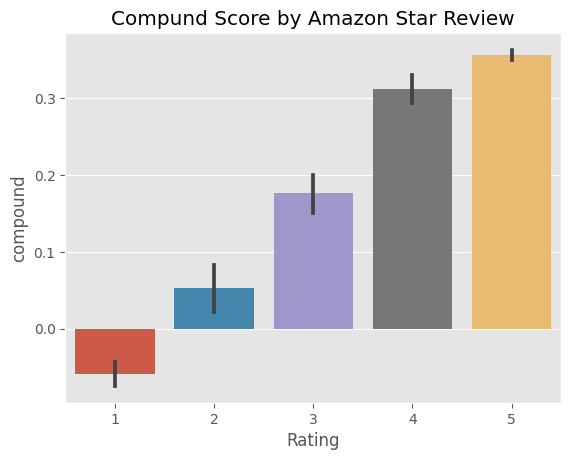

In [30]:
ax = sns.barplot(data=vaders, x='Rating', y='compound')
ax.set_title('Compund Score by Amazon Star Review')
plt.show()

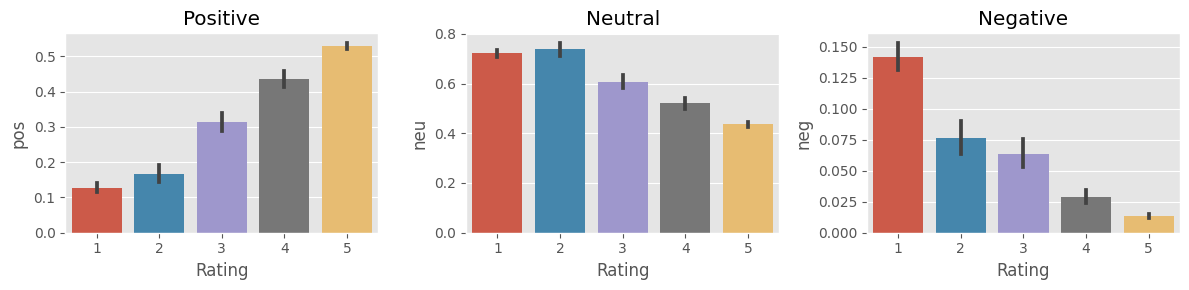

In [31]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vaders, x='Rating', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='Rating', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='Rating', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

# Step 3. Roberta Pretrained Model

- Use a model trained of a large corpus of data.
- Transformer model accounts for the words but also the context related to other words.

In [32]:
!pip install transformers
!pip install torch
!pip install torch torchvision torchaudio


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python3 -m pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python3 -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python3 -m pip install --upgrade pip


In [33]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [34]:
MODEL = 'cardiffnlp/twitter-roberta-base-sentiment'
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [35]:
# VADER results on example
print(example)
sia.polarity_scores(example)

This update is so horrible. I thought I was the only one complaining about the app keeps stopping anytime I open to read mails. This is so poor. You've gotta fix this or restore the old version for us.


{'neg': 0.264, 'neu': 0.688, 'pos': 0.049, 'compound': -0.8652}

In [37]:
# Run for Roberta Model
encoded_text = tokenizer(example, return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(scores_dict)

{'roberta_neg': 0.96748847, 'roberta_neu': 0.02880727, 'roberta_pos': 0.0037042708}


In [38]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

In [42]:
#fazer a iteração em todo dataset
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        text = row['Review']
        myid = i
        vader_result = sia.polarity_scores(text)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value
        roberta_result = polarity_scores_roberta(text)
        both = {**vader_result_rename, **roberta_result}
        res[myid] = both
    except RuntimeError:
        print(f'Broke for id {myid}')

  0%|          | 0/11786 [00:00<?, ?it/s]

Broke for id 7241


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [44]:
#adicionar os resultados ao dataframe
results_df = pd.concat([df, pd.DataFrame(res).T], axis=1)
results_df.head()

,Review,Username,Rating,NegativeRating,NeutralRatings,PositiveFeeling,AppName,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos
0,Crashed too often Confusing It shows for ex 99...,Ayşegül Apaydiner,1,1,0,0,sentimentos,0.188,0.774,0.038,-0.8573,0.958641,0.038094,0.003264
1,It only looks like the legit app but does none...,Harold Galbreath,1,1,0,0,sentimentos,0.143,0.792,0.065,-0.8525,0.944396,0.049842,0.005762
2,I have a limited data plan so I figured that t...,A Google user,2,1,0,0,sentimentos,0.092,0.863,0.045,-0.3182,0.860624,0.124225,0.015151
3,This app is not working at all As soon as I cl...,Shounak Basu,1,1,0,0,sentimentos,0.095,0.816,0.089,-0.1010,0.971548,0.025685,0.002767
4,Google GO apps are garbage They load slow cras...,Some Guy,1,1,0,0,sentimentos,0.233,0.703,0.064,-0.9595,0.974271,0.022774,0.002955


## Compare Scores between models

# Step 3. Combine and compare

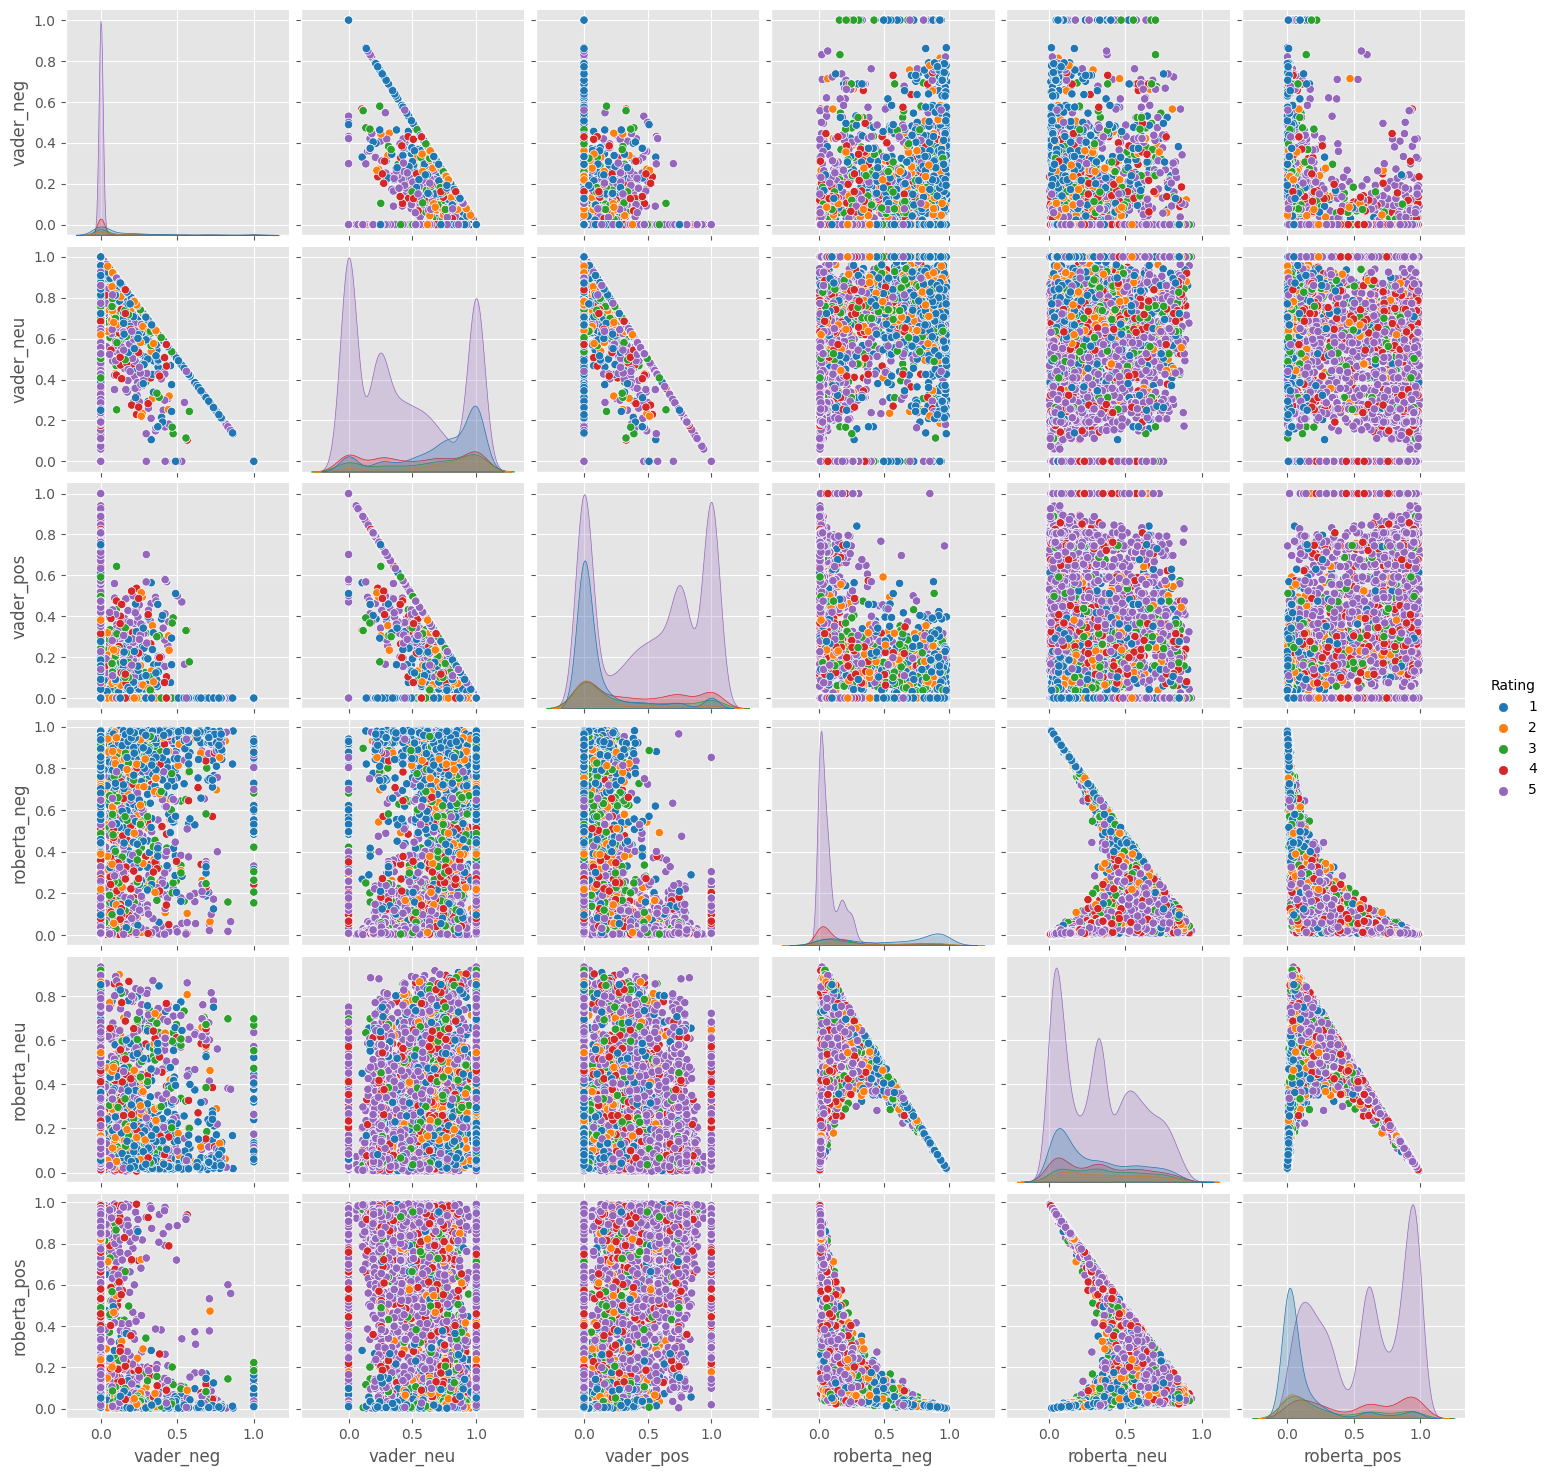

In [46]:
sns.pairplot(data=results_df,
             vars=['vader_neg', 'vader_neu', 'vader_pos',
                  'roberta_neg', 'roberta_neu', 'roberta_pos'],
            hue='Rating',
            palette='tab10')
plt.show()

# Step 4: Review Examples:

- Positive 1-Star and Negative 5-Star Reviews

Lets look at some examples where the model scoring and review score differ the most.

In [48]:
#Considerado positivo pelo modelo roberta, porém recebeu uma estrela pelo avaliador
results_df.query('Rating == 1') \
    .sort_values('roberta_pos', ascending=False)['Review'].values[0]

'I love and like this app really wonderful'

In [49]:
#Considerado positivo pelo modelo vader, porém recebeu uma estrela pelo avaliador
results_df.query('Rating == 1') \
    .sort_values('vader_pos', ascending=False)['Review'].values[0]

'Good'

In [50]:
# nevative sentiment 5-Star view

In [51]:
#Considerado negativo pelo modelo roberta, porém recebeu cinco estrelas pelo avaliador
results_df.query('Rating == 5') \
    .sort_values('roberta_neg', ascending=False)['Review'].values[0]

'I hate it so much'

In [52]:
#Considerado negativo pelo modelo vader, porém recebeu cinco estrelas pelo avaliador
results_df.query('Rating == 5') \
    .sort_values('vader_neg', ascending=False)['Review'].values[0]

'Sorry'

# Extra: The Transformers Pipeline
- Quick & easy way to run sentiment predictions

In [53]:
from transformers import pipeline

sent_pipeline = pipeline("sentiment-analysis")

2023-06-03 01:32:16.646970: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


Xformers is not installed correctly. If you want to use memorry_efficient_attention to accelerate training use the following command to install Xformers
pip install xformers.


In [54]:
sent_pipeline('I love sentiment analysis!')

[{'label': 'POSITIVE', 'score': 0.9997853636741638}]

In [55]:
sent_pipeline('Make sure to like and subscribe!')

[{'label': 'POSITIVE', 'score': 0.9991742968559265}]

In [56]:
sent_pipeline('this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault')

[{'label': 'NEGATIVE', 'score': 0.9980344176292419}]